In [267]:
import pandas as pd
import numpy as np
import torch
import streamlit
import plotly.express as px
import plotly.graph_objects as go
import matplotlib
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
df = df[df['Country/Region'] != 'Diamond Princess']
df = df[df['Country/Region'] != 'MS Zaandam']
df = df.drop(['Province/State', 'Lat', 'Long'], axis=1)
df = df.reset_index(drop=True)
df

Country/Region  1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  \
0              Afghanistan        0        0        0        0        0   
1                  Albania        0        0        0        0        0   
2                  Algeria        0        0        0        0        0   
3                  Andorra        0        0        0        0        0   
4                   Angola        0        0        0        0        0   
..                     ...      ...      ...      ...      ...      ...   
259  Sao Tome and Principe        0        0        0        0        0   
260                  Yemen        0        0        0        0        0   
261                Comoros        0        0        0        0        0   
262             Tajikistan        0        0        0        0        0   
263                Lesotho        0        0        0        0        0   

     1/27/20  1/28/20  1/29/20  1/30/20  ...  6/4/20  6/5/20  6/6/20  6/7/20  \
0          0        0        0        0  ...   18054   18969   19551   20342   
1          0        0        0        0  ...    1197    1212    1232    1246   
2          0        0        0        0  ...    9831    9935   10050   10154   
3          0        0        0        0  ...     852     852     852     852   
4          0        0        0        0  ...      86      86      88      91   
..       ...      ...      ...      ...  ...     ...     ...     ...     ...   
259        0        0        0        0  ...     485     499     499     513   
260        0        0        0        0  ...     453     469     482     484   
261        0        0        0        0  ...     132     132     141     141   
262        0        0        0        0  ...    4289    4370    4453    4529   
263        0        0        0        0  ...       4       4       4       4   

     6/8/20  6/9/20  6/10/20  6/11/20  6/12/20  6/13/20  
0     20917   21459    22142    22890    23546    24102  
1      1263    1299     1341     1385     1416     1464  
2     10265   10382    10484    10589    10698    10810  
3       852     852      852      852      853      853  
4        92      96      113      118      130      138  
..      ...     ...      ...      ...      ...      ...  
259     513     514      611      632      639      659  
260     496     524      560      591      632      705  
261     141     141      162      162      163      176  
262    4609    4690     4763     4834     4902     4971  
263       4       4        4        4        4        4  

[264 rows x 145 columns]

In [3]:
df = df.groupby('Country/Region').sum()
df = df.reset_index()

In [4]:
df.loc[df.loc[df['Country/Region']=='US'].index, 'Country/Region']= 'United States of America'
df.loc[df.loc[df['Country/Region']=='United Kingdom'].index, 'Country/Region']= 'United Kingdom of Great Britain and Northern Ireland'
df.loc[df.loc[df['Country/Region']=='Russia'].index, 'Country/Region']= 'Russian Federation'
df.loc[df.loc[df['Country/Region']=='Venezuela'].index, 'Country/Region']= 'Venezuela (Bolivarian Republic of)'
df.loc[df.loc[df['Country/Region']=='Bolivia'].index, 'Country/Region']= 'Bolivia (Plurinational State of)'
df.loc[df.loc[df['Country/Region']=='Taiwan*'].index, 'Country/Region']= 'Taiwan, Province of China'
df.loc[df.loc[df['Country/Region']=='Syria'].index, 'Country/Region']= 'Syrian Arab Republic'
df.loc[df.loc[df['Country/Region']=='Korea, South'].index, 'Country/Region']= 'Korea, Republic of'
df.loc[df.loc[df['Country/Region']=='Iran'].index, 'Country/Region']= 'Iran (Islamic Republic of)'
df.loc[df.loc[df['Country/Region']=='Cote d\'Ivoire'].index, 'Country/Region']= 'Côte d\'Ivoire'
df.loc[df.loc[df['Country/Region']=='Congo (Kinshasa)'].index, 'Country/Region']= 'Congo, Democratic Republic of the'
df.loc[df.loc[df['Country/Region']=='Congo (Brazzaville)'].index, 'Country/Region']= 'Congo'
df.loc[df.loc[df['Country/Region']=='Moldova'].index, 'Country/Region']= 'Moldova, Republic of'
df.loc[df.loc[df['Country/Region']=='Tanzania'].index, 'Country/Region']= 'Tanzania, United Republic of'
df.loc[df.loc[df['Country/Region']=='Brunei'].index, 'Country/Region']= 'Brunei Darussalam'

In [5]:
df2 = pd.read_csv('data/all.csv')
df2.head()

name alpha-2 alpha-3  country-code     iso_3166-2   region  \
0     Afghanistan      AF     AFG             4  ISO 3166-2:AF     Asia   
1   Åland Islands      AX     ALA           248  ISO 3166-2:AX   Europe   
2         Albania      AL     ALB             8  ISO 3166-2:AL   Europe   
3         Algeria      DZ     DZA            12  ISO 3166-2:DZ   Africa   
4  American Samoa      AS     ASM            16  ISO 3166-2:AS  Oceania   

        sub-region intermediate-region  region-code  sub-region-code  \
0    Southern Asia                 NaN        142.0             34.0   
1  Northern Europe                 NaN        150.0            154.0   
2  Southern Europe                 NaN        150.0             39.0   
3  Northern Africa                 NaN          2.0             15.0   
4        Polynesia                 NaN          9.0             61.0   

   intermediate-region-code  
0                       NaN  
1                       NaN  
2                       NaN  
3                       NaN  
4                       NaN

In [6]:
code2 = []
for i in df['Country/Region']:
    try:
        code2.append(df2[df2['name']==i]['alpha-3'].values[0])
    except:
        print(i)
        code2.append('NA')

df['code'] = code2

Burma
Kosovo
Laos
Vietnam
West Bank and Gaza


In [7]:
df = df.melt(id_vars=["Country/Region", "code"], 
        var_name="Dates", 
        value_name="Cases")

In [8]:
df.head()

Country/Region code    Dates  Cases
0    Afghanistan  AFG  1/22/20      0
1        Albania  ALB  1/22/20      0
2        Algeria  DZA  1/22/20      0
3        Andorra  AND  1/22/20      0
4         Angola  AGO  1/22/20      0

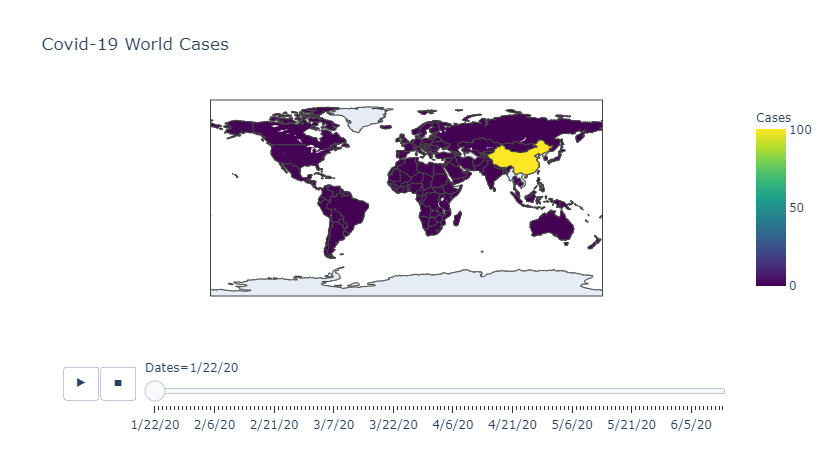

In [23]:
up, low = 100, 0
#up, low = np.inf, np.inf

fig = px.choropleth(df, locations="code", hover_name="Country/Region", 
                    animation_frame="Dates", 
                    color_continuous_scale=px.colors.sequential.Viridis,
                    color="Cases",
                    title="Covid-19 World Cases",
                    range_color=[low,up]) 
fig.show()

In [32]:
def world_map(resources, df2):
    datasets = []
    for link in resources:
        df = pd.read_csv(link)
        df = df[df['Country/Region'] != 'Diamond Princess']
        df = df[df['Country/Region'] != 'MS Zaandam']
        df = df.drop(['Province/State', 'Lat', 'Long'], axis=1)
        df = df.reset_index(drop=True)
        df = df.groupby('Country/Region').sum()
        df = df.reset_index()
        df.loc[df.loc[df['Country/Region']=='US'].index, 'Country/Region']= 'United States of America'
        df.loc[df.loc[df['Country/Region']=='United Kingdom'].index, 'Country/Region']= 'United Kingdom of Great Britain and Northern Ireland'
        df.loc[df.loc[df['Country/Region']=='Russia'].index, 'Country/Region']= 'Russian Federation'
        df.loc[df.loc[df['Country/Region']=='Venezuela'].index, 'Country/Region']= 'Venezuela (Bolivarian Republic of)'
        df.loc[df.loc[df['Country/Region']=='Bolivia'].index, 'Country/Region']= 'Bolivia (Plurinational State of)'
        df.loc[df.loc[df['Country/Region']=='Taiwan*'].index, 'Country/Region']= 'Taiwan, Province of China'
        df.loc[df.loc[df['Country/Region']=='Syria'].index, 'Country/Region']= 'Syrian Arab Republic'
        df.loc[df.loc[df['Country/Region']=='Korea, South'].index, 'Country/Region']= 'Korea, Republic of'
        df.loc[df.loc[df['Country/Region']=='Iran'].index, 'Country/Region']= 'Iran (Islamic Republic of)'
        df.loc[df.loc[df['Country/Region']=='Cote d\'Ivoire'].index, 'Country/Region']= 'Côte d\'Ivoire'
        df.loc[df.loc[df['Country/Region']=='Congo (Kinshasa)'].index, 'Country/Region']= 'Congo, Democratic Republic of the'
        df.loc[df.loc[df['Country/Region']=='Congo (Brazzaville)'].index, 'Country/Region']= 'Congo'
        df.loc[df.loc[df['Country/Region']=='Moldova'].index, 'Country/Region']= 'Moldova, Republic of'
        df.loc[df.loc[df['Country/Region']=='Tanzania'].index, 'Country/Region']= 'Tanzania, United Republic of'
        df.loc[df.loc[df['Country/Region']=='Brunei'].index, 'Country/Region']= 'Brunei Darussalam'
        code2 = []
        for i in df['Country/Region']:
            try:
                code2.append(df2[df2['name']==i]['alpha-3'].values[0])
            except:
                #print(i)
                code2.append('NA')

        df['code'] = code2
        df = df.melt(id_vars=["Country/Region", "code"], 
                var_name="Dates", 
                value_name="Cases")
        datasets.append(df)
    return datasets

    
def world_plot(df, up, low, name):
    fig = px.choropleth(df, locations="code", hover_name="Country/Region", 
                        animation_frame="Dates", 
                        color_continuous_scale=px.colors.sequential.Viridis,
                        color="Cases",
                        title="Covid-19 World "+str(name),
                        range_color=[low,up]) 
    fig.show()

In [29]:
df2 = pd.read_csv('all.csv')
up, low = np.inf, 0
resources = ['https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv',
             'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv',
             'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
            ]

data_list = world_map(resources, df2)

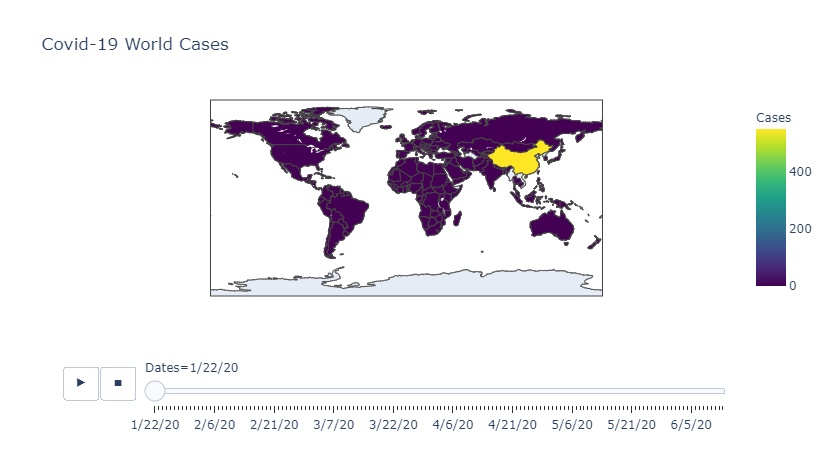

In [33]:
world_plot(data_list[0], up, low, name='Cases')

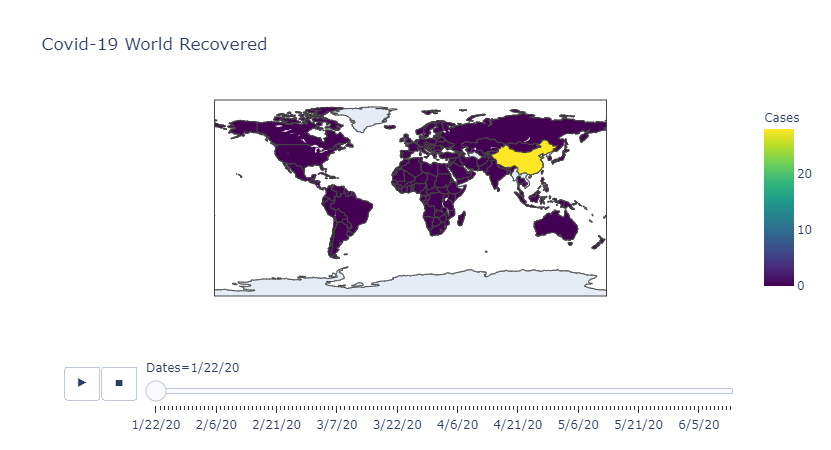

In [34]:
world_plot(data_list[1], up, low, name='Recovered')

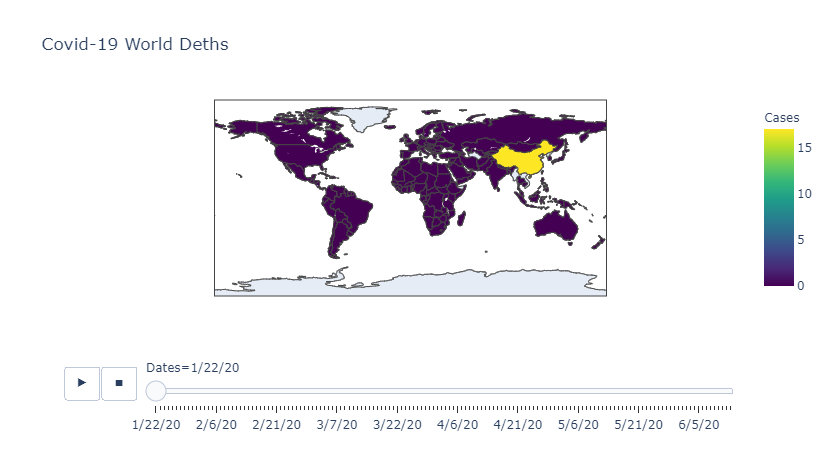

In [291]:
world_plot(data_list[2], up, 0, name='Deths')

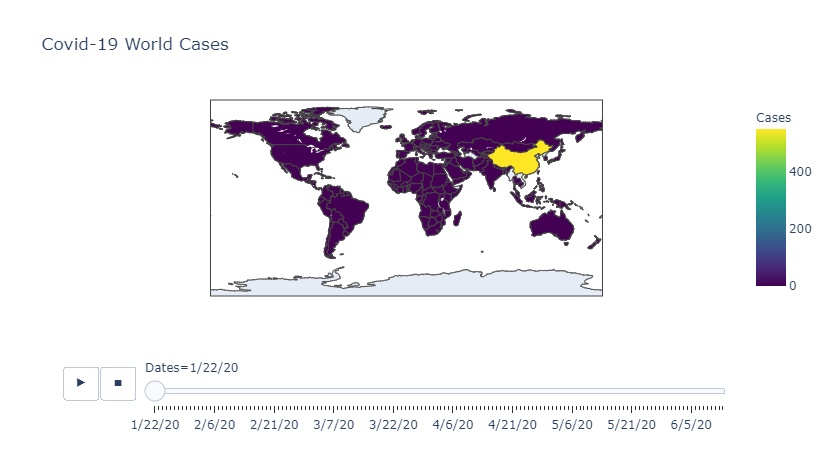

In [290]:
world_plot(data_list[0], 100, np.inf, name='Cases')

In [285]:
totay_cases = data_list[0][data_list[0]['Dates']==data_list[0]['Dates'].unique()[::-1][0]]
today_deths = data_list[2][data_list[2]['Dates']==data_list[2]['Dates'].unique()[::-1][0]]
today = pd.merge(totay_cases, today_deths, left_on='Country/Region', right_on='Country/Region', how='inner')
today.loc[today.loc[today['Country/Region']=='United Kingdom of Great Britain and Northern Ireland'].index, 'Country/Region'] = 'United Kingdom'
today_top = today.sort_values(by='Cases_y', ascending=False)[:10]
yest_cases = data_list[0][data_list[0]['Dates']==data_list[0]['Dates'].unique()[::-1][1]]
yest_deths = data_list[2][data_list[2]['Dates']==data_list[2]['Dates'].unique()[::-1][1]]
yest = pd.merge(yest_cases, yest_deths, left_on='Country/Region', right_on='Country/Region', how='inner')
yest.loc[yest.loc[yest['Country/Region']=='United Kingdom of Great Britain and Northern Ireland'].index, 'Country/Region'] = 'United Kingdom'
yest_top = yest.sort_values(by='Cases_y', ascending=False)[:10]
res = pd.merge(today_top, yest_top, left_on='Country/Region', right_on='Country/Region', how='inner')
last_cases = res['Cases_x_x'] - res['Cases_x_y']
last_deths = res['Cases_y_x'] - res['Cases_y_y']

In [286]:
def stats(countries, infected, died, title):
    fig, ax = plt.subplots(nrows=1, ncols=2, sharey=True)
    fig.set_size_inches(18.5, 10.5)

    x = list(countries.values)

    n_cases = list(infected.values)
    ax[0].barh(x, n_cases, color='green')
    ax[0].set_xlabel("Number of Cases", fontsize=25)

    n_deths = list(died.values)
    ax[1].barh(x, n_deths, color='green')
    ax[1].set_xlabel("Number of Deths", fontsize=25)

    ax[1].set_yticks(x, [])
    ax[1].invert_yaxis()
    ax[0].set_yticklabels(x, fontsize=22)

    ax[0].tick_params(axis="x", labelsize=20, rotation=30)
    ax[1].tick_params(axis="x", labelsize=20, rotation=30)
    ax[0].get_xaxis().set_major_formatter(
        matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
    ax[1].get_xaxis().set_major_formatter(
        matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

    fig.suptitle(title, fontsize=30)
    fig.tight_layout()
    fig.subplots_adjust(top=0.92)
    plt.show()

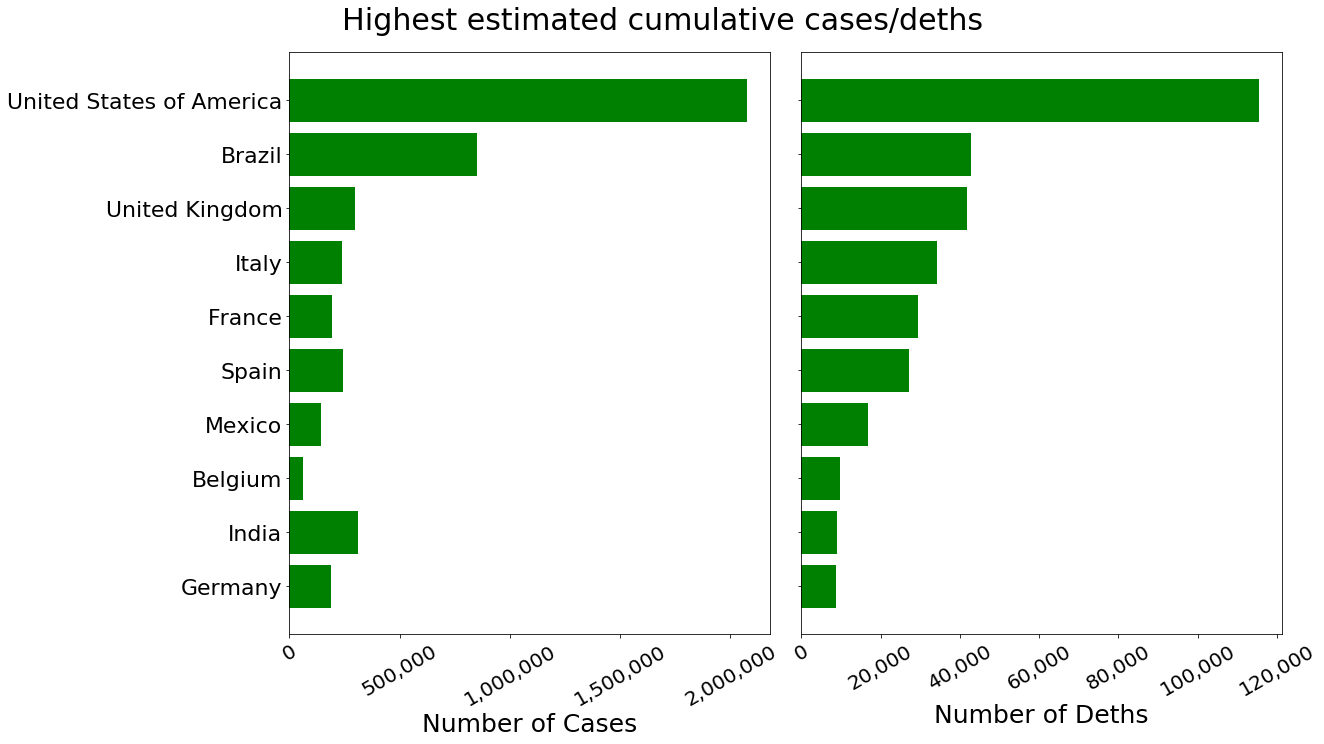

In [287]:
stats(today_top['Country/Region'], today_top['Cases_x'], 
      today_top['Cases_y'], "Highest estimated cumulative cases/deths")

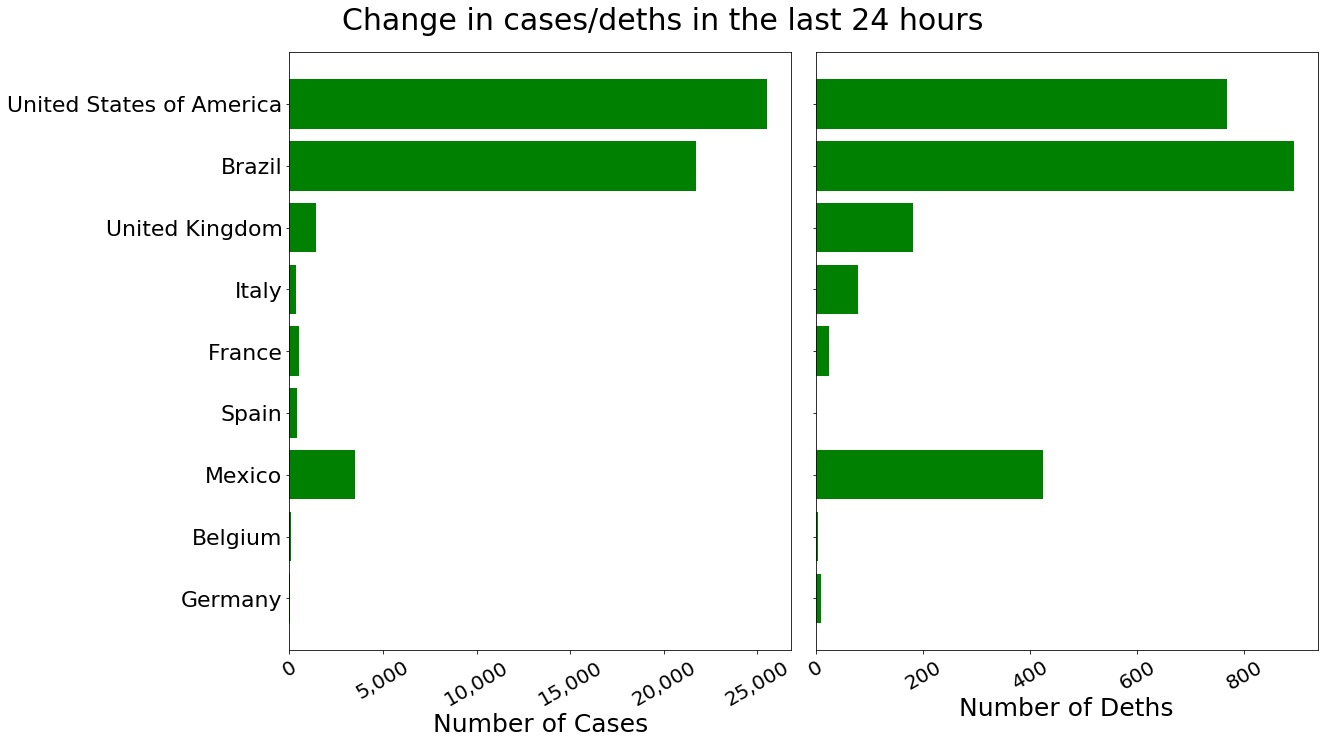

In [288]:
stats(res['Country/Region'], last_cases, 
      last_deths, "Change in cases/deths in the last 24 hours")